Using TensorFlow backend.


10297344/11490434 [=========================>....] - ETA: 0s(50000, 28, 28) (50000,)


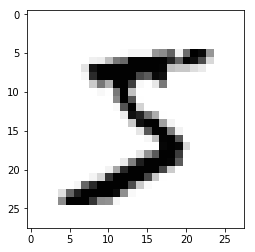

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [59]:
import tensorflow as tf

weights = {
    'h1': tf.Variable(tf.random_normal([784, 200])),
    'out': tf.Variable(tf.random_normal([200, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([200])),
    'out': tf.Variable(tf.random_normal([10]))
}

In [60]:
X = tf.placeholder(tf.float32, [None, 28, 28])
X_reshaped = tf.contrib.layers.flatten(X)
y = tf.placeholder(tf.int64, [None])
y_onehot = tf.one_hot(y,10)

In [61]:

hidden = tf.nn.relu(tf.add(tf.matmul(X_reshaped, weights['h1']), biases['b1']))
output = tf.add(tf.matmul(hidden, weights['out']), biases['out'])
logits = output
pred = tf.nn.softmax(logits)

correct_prediction = tf.equal(y, tf.argmax(pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [62]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_onehot))
optimizer = tf.train.AdamOptimizer(learning_rate=0.05)
train = optimizer.minimize(loss)

In [63]:
from sklearn.metrics import roc_auc_score

s = tf.Session()
s.run(tf.global_variables_initializer())
for i in range(50):
    s.run([train,loss], {X: X_train, y: y_train})
    loss_i = s.run(loss, {X: X_train, y: y_train})
    print("loss at iter %i:%.4f" % (i, loss_i))
    print("test accuracy %.4f"% s.run(accuracy, {X: X_test, y: y_test}))
    #print("test auc:", roc_auc_score(y_test, s.run(predicted_y, {X:X_test})))

loss at iter 0:94.5988
test accuracy 0.2736
loss at iter 1:66.8553
test accuracy 0.4518
loss at iter 2:53.2069
test accuracy 0.6142
loss at iter 3:45.8263
test accuracy 0.6487
loss at iter 4:33.5024
test accuracy 0.7154
loss at iter 5:25.5159
test accuracy 0.7448
loss at iter 6:19.3198
test accuracy 0.7489
loss at iter 7:13.4940
test accuracy 0.7806
loss at iter 8:10.7444
test accuracy 0.8028
loss at iter 9:12.6862
test accuracy 0.7844
loss at iter 10:15.1281
test accuracy 0.7512
loss at iter 11:12.8289
test accuracy 0.7754
loss at iter 12:9.0548
test accuracy 0.8211
loss at iter 13:6.9881
test accuracy 0.8499
loss at iter 14:6.3769
test accuracy 0.8606
loss at iter 15:6.4400
test accuracy 0.8606
loss at iter 16:6.6803
test accuracy 0.8611
loss at iter 17:6.8217
test accuracy 0.8574
loss at iter 18:6.7350
test accuracy 0.8558
loss at iter 19:6.4038
test accuracy 0.8591
loss at iter 20:5.9111
test accuracy 0.8647
loss at iter 21:5.3688
test accuracy 0.8692
loss at iter 22:4.8716
test ac